In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
gamma1 = loadtxt('gamma1.dat')
gamma2 = loadtxt('gamma2.dat')

In [3]:
gamma1.shape

(1024, 1024)

<matplotlib.colorbar.Colorbar instance at 0x1077ed8c0>

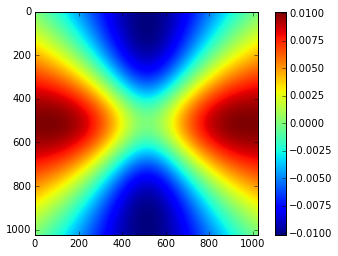

In [4]:
imshow(gamma1)
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x10fb8d2d8>

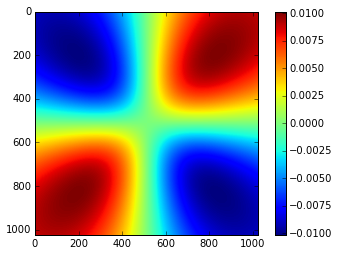

In [5]:
imshow(gamma2)
colorbar()

In [6]:
fttgamma1 = fft2(gamma1)

In [7]:
fttgamma1.shape

(1024, 1024)

<matplotlib.colorbar.Colorbar instance at 0x1225ec638>

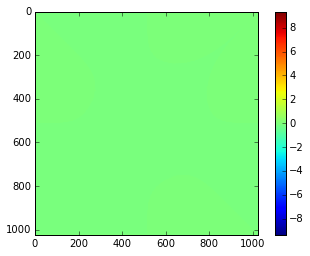

In [97]:
imshow(imag(fttgamma1))
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x114b67e60>

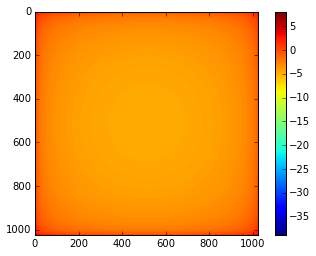

In [9]:
fttgamma2 = fft2(gamma2)
imshow(log(abs(fttgamma2)))
colorbar()

In [14]:
fttgamma1[512][512]

(-1.9428902930940239e-15+0j)

In [64]:
tgamma1 = np.zeros([512,512]).astype(complex)
tgamma2 = np.zeros([512,512]).astype(complex)

In [65]:
for i in range(512):
    for j in range(512):
        tgamma1[i,j] =  fttgamma1[i,j]
        tgamma2[i,j] =  fttgamma2[i,j]

In [66]:
tkappa = np.zeros([512,512]).astype(complex)
for k1 in range(512):
    for k2 in range(512):
        if ( (k1 != 0) & (k2 != 0) ):
            tkappa[k1,k2] = (k1**2 + k2**2)**(-0.5) * ((k1**2 - k2**2)*tgamma1[k1,k2]+ 2*k1*k2*tgamma2[k1,k2])
tkappa[0,0]=0

<matplotlib.colorbar.Colorbar instance at 0x11e79afc8>

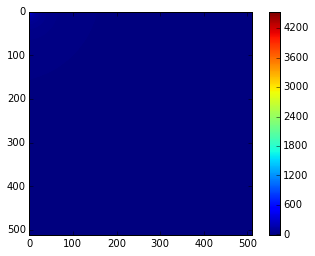

In [93]:
imshow(real(tkappa))
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11f127638>

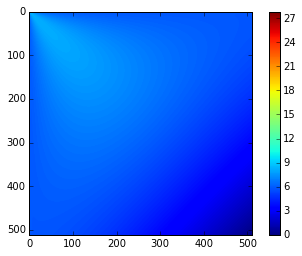

In [94]:
imshow(imag(tkappa))
colorbar()

In [72]:
kappa = ifft(tkappa)

<matplotlib.colorbar.Colorbar instance at 0x112a2bb90>

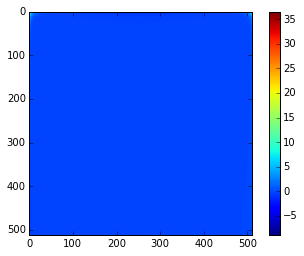

In [78]:
imshow(real(kappa))
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11307bcf8>

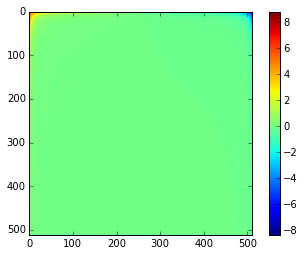

In [80]:
imshow(imag(kappa))
colorbar()

In [81]:
kappa_ext = np.zeros([1024,1024]).astype(complex)

In [89]:
for i in range(1024):
    if i>=512:
        l = i-512
    else:
        l = 511-i
        
    for j in range(1024):
        
        if j>=512:
            m = j-512
        else:
            m = 511-j
        
        kappa_ext[i,j] = kappa[l,m]

<matplotlib.colorbar.Colorbar instance at 0x117636c68>

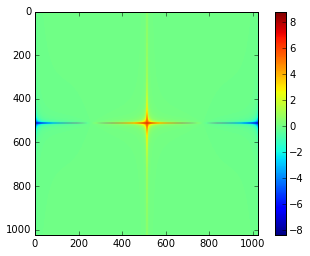

In [90]:
imshow(imag(kappa_ext))
colorbar()

In [101]:
frec = fftfreq(gamma1.shape[0])

In [103]:
for i in range(300):
    print frec[3*i]

0.0
0.0029296875
0.005859375
0.0087890625
0.01171875
0.0146484375
0.017578125
0.0205078125
0.0234375
0.0263671875
0.029296875
0.0322265625
0.03515625
0.0380859375
0.041015625
0.0439453125
0.046875
0.0498046875
0.052734375
0.0556640625
0.05859375
0.0615234375
0.064453125
0.0673828125
0.0703125
0.0732421875
0.076171875
0.0791015625
0.08203125
0.0849609375
0.087890625
0.0908203125
0.09375
0.0966796875
0.099609375
0.1025390625
0.10546875
0.1083984375
0.111328125
0.1142578125
0.1171875
0.1201171875
0.123046875
0.1259765625
0.12890625
0.1318359375
0.134765625
0.1376953125
0.140625
0.1435546875
0.146484375
0.1494140625
0.15234375
0.1552734375
0.158203125
0.1611328125
0.1640625
0.1669921875
0.169921875
0.1728515625
0.17578125
0.1787109375
0.181640625
0.1845703125
0.1875
0.1904296875
0.193359375
0.1962890625
0.19921875
0.2021484375
0.205078125
0.2080078125
0.2109375
0.2138671875
0.216796875
0.2197265625
0.22265625
0.2255859375
0.228515625
0.2314453125
0.234375
0.2373046875
0.240234375
0.2431640

In [105]:
gamma1.shape[0]

1024